In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utility_modified import get_molecular_data, obtain_PES
from tequila import QubitHamiltonian, Variable, quantumchemistry, gates, PauliString, minimize
from timeit import default_timer as timer

basis = 'sto-3g'

## H<sub>2</sub>O

In [3]:
bond_lengths = np.linspace(0.1,2.5,15)
bond_lengths

array([0.1       , 0.27142857, 0.44285714, 0.61428571, 0.78571429,
       0.95714286, 1.12857143, 1.3       , 1.47142857, 1.64285714,
       1.81428571, 1.98571429, 2.15714286, 2.32857143, 2.5       ])

In [4]:
get_molecular_data('h2o', 1)

[['O', [0, 0, 0]],
 ['H', [-0.8069603121438019, 0.5906056676199254, 0]],
 ['H', [0.8069603121438019, 0.5906056676199254, 0]]]

In [5]:
#Run FCI
start = timer()
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')
end = timer()

E = -20.553771141334764 Eh
E = -64.564818707552 Eh
E = -72.14984536015112 Eh
E = -74.24382722957368 Eh
E = -74.85934058833972 Eh
E = -75.01055655633581 Eh
E = -75.00356512166908 Eh
E = -74.94630669715279 Eh
E = -74.88182451078211 Eh
E = -74.82681470609228 Eh
E = -74.78732953658485 Eh
E = -74.76322402929027 Eh
E = -74.75030651311205 Eh
E = -74.74382125661842 Eh
E = -74.74059050316203 Eh


In [6]:
timefci_h2o = end - start
timefci_h2o

17.394624373999996

In [7]:
#Run HF
start = timer()
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')
end = timer()

E = -20.552132284766426 Eh
E = -64.55967663960871 Eh
E = -72.13907969071613 Eh
E = -74.22459875378345 Eh
E = -74.82823817948282 Eh
E = -74.96165147934957 Eh
E = -74.92817508740464 Eh
E = -74.83391237791122 Eh
E = -74.72139237065929 Eh
E = -74.60781024500737 Eh
E = -74.50149773997009 Eh
E = -74.40772786804456 Eh
E = -74.32694041215728 Eh
E = -74.26084947441159 Eh
E = -74.2722265299641 Eh


In [8]:
timehf_h2o = end - start
timehf_h2o

37.76245230600001

In [9]:
#Run CCSD
start = timer()
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')
end = timer()

E = -20.553770535981744 Eh
E = -64.5648146605731 Eh
E = -72.14982918998028 Eh
E = -74.24379590307741 Eh
E = -74.85927788559391 Eh
E = -75.01043286702772 Eh
E = -75.00330155818898 Eh
E = -74.94573255480928 Eh
E = -74.88088098064634 Eh
E = -74.82649324674901 Eh
E = -74.79153267626143 Eh
E = -74.77426949942473 Eh
E = -74.77830089113601 Eh
E = -74.78204801890462 Eh
E = -74.64213142546797 Eh


In [10]:
timeccsd_h2o = end - start
timeccsd_h2o

32.007868839

In [11]:
#Run CISD
start = timer()
CISD_PES = obtain_PES('h2o', bond_lengths, basis,  method='cisd')
end = timer()

E = -20.553770812485425 Eh
E = -64.5648145959698 Eh
E = -72.14982004728138 Eh
E = -74.24374970731145 Eh
E = -74.85911078857973 Eh
E = -75.0098608313933 Eh
E = -75.00147251331126 Eh
E = -74.94060599622638 Eh
E = -74.86855809487216 Eh
E = -74.80061567921794 Eh
E = -74.74338072313807 Eh
E = -74.71240657645414 Eh
E = -74.72447568007452 Eh
E = -74.73073132402115 Eh
E = -74.60472782571637 Eh


In [12]:
timecisd_h2o = end - start
timecisd_h2o

14.103590394999998

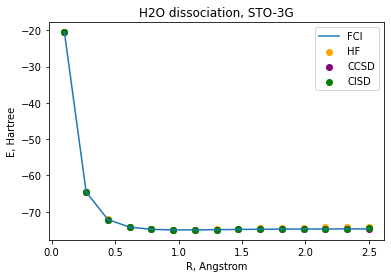

In [13]:
#Plot CH4 PESs

plt.title('H2O dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green')

plt.legend()
plt.savefig('h2o_dissociation')

In [18]:
min(FCI_PES), min(CCSD_PES), min(CISD_PES), min(HF_PES)

-75.01055655633581

In [16]:
bond_lengths[5]

0.9571428571428572

In [20]:
get_molecular_data('h2o', 0.9571428571428572)

[['O', [0, 0, 0]],
 ['H', [-0.7723762987662105, 0.5652939961505, 0]],
 ['H', [0.7723762987662105, 0.5652939961505, 0]]]

## Strawberry Fields

In [21]:
import strawberryfields as sf
import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np
import pennylane_qiskit

#dev = qml.device('default.qubit', wires=2)
sf.version()

'0.19.0-dev'

In [23]:
sf.store_account("eyJhbGciOiJIUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICIwYTdjOGE5Yi1lMzdkLTQ0MzItOTU2OC0xNzI3YzEwNmYyMzEifQ.eyJpYXQiOjE2MjcwMjA1MDEsImp0aSI6IjhhZWI2OTcwLWJkNGItNGNiOS04YjM3LTEyMzEwMmE1M2NhNyIsImlzcyI6Imh0dHBzOi8vcGxhdGZvcm0uc3RyYXdiZXJyeWZpZWxkcy5haS9hdXRoL3JlYWxtcy9wbGF0Zm9ybSIsImF1ZCI6Imh0dHBzOi8vcGxhdGZvcm0uc3RyYXdiZXJyeWZpZWxkcy5haS9hdXRoL3JlYWxtcy9wbGF0Zm9ybSIsInN1YiI6IjhiYWMzYWJlLTIxZDItNDJmZi05ODMzLTRiZWMxNGIxMWIyNyIsInR5cCI6Ik9mZmxpbmUiLCJhenAiOiJwdWJsaWMiLCJzZXNzaW9uX3N0YXRlIjoiMGM2NzA4ZWMtZTMwNS00NDBhLWExZDYtMGNmMGNmODllMmQ1Iiwic2NvcGUiOiJwdWJsaWMtcm9sZXMgcHJvZmlsZSBlbWFpbCBvZmZsaW5lX2FjY2VzcyJ9.45UZEMqBtevwLSSpnoOFebxnvIshYLtRDydVt2q5ZAY")
sf.ping()

You have successfully authenticated to the platform!


In [6]:
# np.array([['C', [0, 0, 0]],
#  ['H', [0, 0, 'geometry']],
#  ['H', [1.026719, 0, -0.363]],
#  ['H', [-0.51336, -0.889165, -0.363]],
#  ['H', [-0.51336, 0.889165, -0.363]]])

# [['O', [0, 0, 0]],
#  ['H', [-0.7723762987662105, 0.5652939961505, 0]],
#  ['H', [0.7723762987662105, 0.5652939961505, 0]]]

In [24]:
symbols = ["O", "H", "H"]
coordinates = np.array([0.0, 0.0, 0.0, -0.7723762987662105, 0.5652939961505, 0, 0.7723762987662105, 0.5652939961505, 0])

H, qubits = qchem.molecular_hamiltonian(symbols, coordinates) # Lots of defaults; maybe mention
print(f"Number of qubits = {qubits}\n")
print(f"H = {H}")

Number of qubits = 14

H =   (-41.65086568773535) [I0]
+ (0.5824027017294464) [Z10]
+ (0.5824027017294464) [Z11]
+ (0.6143979663776165) [Z12]
+ (0.6143979663776165) [Z13]
+ (1.5338047456067934) [Z8]
+ (1.5338047456067945) [Z9]
+ (1.5559044025383046) [Z7]
+ (1.555904402538305) [Z6]
+ (1.6240588943469416) [Z5]
+ (1.6240588943469418) [Z4]
+ (1.9990640487361744) [Z2]
+ (1.9990640487361744) [Z3]
+ (12.688386626202254) [Z0]
+ (12.688386626202256) [Z1]
+ (0.0019625975194249154) [Y1 Y3]
+ (0.0019625975194249154) [X1 X3]
+ (0.10820111073064975) [Y0 Y2]
+ (0.10820111073064975) [X0 X2]
+ (0.11370179882325783) [Z10 Z12]
+ (0.11370179882325783) [Z11 Z13]
+ (0.12520382682734302) [Z6 Z10]
+ (0.12520382682734302) [Z7 Z11]
+ (0.12788936925272873) [Z10 Z11]
+ (0.12968672377106166) [Z6 Z11]
+ (0.12968672377106166) [Z7 Z10]
+ (0.13054653114376127) [Z8 Z10]
+ (0.13054653114376127) [Z9 Z11]
+ (0.13180602403040134) [Z4 Z10]
+ (0.13180602403040134) [Z5 Z11]
+ (0.13208610695826398) [Z2 Z10]
+ (0.13208610695826

In [26]:
dev = qml.device('default.qubit', wires=14)
dev

<DefaultQubit device (wires=14, shots=None) at 0x15f7cf410>

In [27]:
electrons = 4
hf = qml.qchem.hf_state(electrons, qubits)
print(hf)

[1 1 1 1 0 0 0 0 0 0 0 0 0 0]


In [28]:
len(hf)

14

In [29]:
def initialize_state():
    qml.BasisState(hf, wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
    
def variational_circuit(theta):
    qml.DoubleExcitation(theta, wires=[0,1,2,3]) 

def vqe_circuit(theta, wires):
    initialize_state()
    variational_circuit(theta)

In [30]:
cost  = qml.ExpvalCost(vqe_circuit, H, dev)
opt   = qml.GradientDescentOptimizer(stepsize=0.4)
theta = np.array(0.0)

In [ ]:
energy_record = [cost(theta)] 
theta_record  = [theta]

import time
 
for n in range(5):
    t1 = time.time()
    print("optimizing step starts: " + str(t1))
    theta, prev_energy = opt.step_and_cost(cost, theta)
    print(theta, prev_energy)
    t2 = time.time()
    print("optimizing step finishes: " + str(t2))
    print("cost calculation begins: ")
    energy = cost(theta)
    
    print("energy calculation " + str(energy))
    energy_record.append(energy)
    theta_record.append(theta)
    
    print(f"n = {n},  E = {energy:.8f} H, t = {(t2-t1):.3f} S")
    
#     if np.abs(energy - prev_energy) <= 1e-6:
#         break

optimizing step starts: 1627170683.259657
0.0 -57.77161630020447
optimizing step finishes: 1627170726.596224
cost calculation begins: 
energy calculation -57.77161630020447
n = 0,  E = -57.77161630 H, t = 43.337 S
optimizing step starts: 1627170738.238456
0.0 -57.77161630020447
optimizing step finishes: 1627170785.117007
cost calculation begins: 
energy calculation -57.77161630020447
n = 1,  E = -57.77161630 H, t = 46.879 S
optimizing step starts: 1627170820.96523


In [30]:
import time
import numpy
import numpy as np
import scipy.linalg
from pyscf import lib
from pyscf.lib import logger
from pyscf import ao2mo
from pyscf.hessian import rhf as rhf_hess
from pyscf.df.grad.rhf import _int3c_wrapper


def partial_hess_elec(hessobj, mo_energy=None, mo_coeff=None, mo_occ=None,
                      atmlst=None, max_memory=4000, verbose=None):
    e1, ej, ek = _partial_hess_ejk(hessobj, mo_energy, mo_coeff, mo_occ,
                                   atmlst, max_memory, verbose, True)
    return e1 + ej - ek


def _partial_hess_ejk(hessobj, mo_energy=None, mo_coeff=None, mo_occ=None,
                      atmlst=None, max_memory=4000, verbose=None, with_k=True):
    '''Partial derivative
    '''
    log = logger.new_logger(hessobj, verbose)
    time0 = t1 = (time.clock(), time.time())

    mol = hessobj.mol
    mf = hessobj.base
    if mo_energy is None: mo_energy = mf.mo_energy
    if mo_occ is None:    mo_occ = mf.mo_occ
    if mo_coeff is None:  mo_coeff = mf.mo_coeff
    if atmlst is None: atmlst = range(mol.natm)

    nao, nmo = mo_coeff.shape
    mocc = mo_coeff[:,mo_occ>0]
    mocc_2 = np.einsum('pi,i->pi', mocc, mo_occ[mo_occ>0]**.5)
    nocc = mocc.shape[1]
    dm0 = numpy.dot(mocc, mocc.T) * 2
    # Energy weighted density matrix
    dme0 = numpy.einsum('pi,qi,i->pq', mocc, mocc, mo_energy[mo_occ>0]) * 2

    auxmol = hessobj.base.with_df.auxmol
    naux = auxmol.nao
    nbas = mol.nbas
    auxslices = auxmol.aoslice_by_atom()
    aoslices = mol.aoslice_by_atom()
    aux_loc = auxmol.ao_loc
    blksize = min(480, hessobj.max_memory*.3e6/8/nao**2)
    aux_ranges = ao2mo.outcore.balance_partition(auxmol.ao_loc, blksize)

    hcore_deriv = hessobj.hcore_generator(mol)
    s1aa, s1ab, s1a = rhf_hess.get_ovlp(mol)

    ftmp = lib.H5TmpFile()
    get_int3c = _int3c_wrapper(mol, auxmol, 'int3c2e', 's1')
# Without RI basis response
#    (20|0)(0|00)
#    (11|0)(0|00)
#    (10|0)(0|10)
    int2c = auxmol.intor('int2c2e', aosym='s1')
    int2c_low = scipy.linalg.cho_factor(int2c, lower=True)
    int2c_ip1 = auxmol.intor('int2c2e_ip1', aosym='s1')

    rhoj0_P = 0
    if with_k:
        if hessobj.max_memory*.8e6/8 < naux*nocc*(nocc+nao):
            raise RuntimeError('Memory not enough. You need to increase mol.max_memory')
        rhok0_Pl_ = np.empty((naux,nao,nocc))
    for i, (shl0, shl1, p0, p1) in enumerate(aoslices):
        int3c = get_int3c((shl0, shl1, 0, nbas, 0, auxmol.nbas))
        rhoj0_P += np.einsum('klp,kl->p', int3c, dm0[p0:p1])
        if with_k:
            tmp = lib.einsum('ijp,jk->pik', int3c, mocc_2)
            tmp = scipy.linalg.cho_solve(int2c_low, tmp.reshape(naux,-1), overwrite_b=True)
            rhok0_Pl_[:,p0:p1] = tmp.reshape(naux,p1-p0,nocc)
        int3c = tmp = None
    rhoj0_P = scipy.linalg.cho_solve(int2c_low, rhoj0_P)

    get_int3c_ipip1 = _int3c_wrapper(mol, auxmol, 'int3c2e_ipip1', 's1')
    vj1_diag = 0
    vk1_diag = 0
    for shl0, shl1, nL in aux_ranges:
        shls_slice = (0, nbas, 0, nbas, shl0, shl1)
        p0, p1 = aux_loc[shl0], aux_loc[shl1]
        int3c_ipip1 = get_int3c_ipip1(shls_slice)
        vj1_diag += np.einsum('xijp,p->xij', int3c_ipip1, rhoj0_P[p0:p1]).reshape(3,3,nao,nao)
        if with_k:
            tmp = lib.einsum('Plj,Jj->PlJ', rhok0_Pl_[p0:p1], mocc_2)
            vk1_diag += lib.einsum('xijp,plj->xil', int3c_ipip1, tmp).reshape(3,3,nao,nao)
    int3c_ipip1 = get_int3c_ipip1 = tmp = None
    t1 = log.timer_debug1('contracting int2e_ipip1', *t1)

    get_int3c_ip1 = _int3c_wrapper(mol, auxmol, 'int3c2e_ip1', 's1')
    rho_ip1 = ftmp.create_dataset('rho_ip1', (nao,nao,naux,3), 'f8')
    rhok_ip1_IkP = ftmp.create_group('rhok_ip1_IkP')
    rhok_ip1_PkI = ftmp.create_group('rhok_ip1_PkI')
    rhoj1 = np.empty((mol.natm,naux,3))
    wj1 = np.empty((mol.natm,naux,3))
    for i0, ia in enumerate(atmlst):
        shl0, shl1, p0, p1 = aoslices[ia]
        shls_slice = (shl0, shl1, 0, nbas, 0, auxmol.nbas)
        int3c_ip1 = get_int3c_ip1(shls_slice)
        tmp_ip1 = scipy.linalg.cho_solve(int2c_low, int3c_ip1.reshape(-1,naux).T,
                                         overwrite_b=True).reshape(naux,3,p1-p0,nao)
        rhoj1[i0] = np.einsum('pxij,ji->px', tmp_ip1, dm0[:,p0:p1])
        wj1[i0] = np.einsum('xijp,ji->px', int3c_ip1, dm0[:,p0:p1])
        rho_ip1[p0:p1] = tmp_ip1.transpose(2,3,0,1)
        if with_k:
            tmp = lib.einsum('pykl,li->ikpy', tmp_ip1, dm0)
            rhok_ip1_IkP['%.4d'%ia] = tmp
            rhok_ip1_PkI['%.4d'%ia] = tmp.transpose(2,1,0,3)
            tmp = None
    ej = lib.einsum('ipx,jpy->ijxy', rhoj1, wj1) * 4
    ek = np.zeros_like(ej)
    e1 = np.zeros_like(ej)
    rhoj1 = wj1 = None

    if with_k:
        vk2buf = 0
        for shl0, shl1, nL in aux_ranges:
            shls_slice = (0, nbas, 0, nbas, shl0, shl1)
            p0, p1 = aux_loc[shl0], aux_loc[shl1]
            int3c_ip1 = get_int3c_ip1(shls_slice)
            vk2buf += lib.einsum('xijp,pkjy->xyki', int3c_ip1,
                                 _load_dim0(rhok_ip1_PkI, p0, p1))
            int3c_ip1 = None

    get_int3c_ip2 = _int3c_wrapper(mol, auxmol, 'int3c2e_ip2', 's1')
    wj_ip2 = np.empty((naux,3))
    wk_ip2_Ipk = ftmp.create_dataset('wk_ip2', (nao,naux,3,nao), 'f8')
    if hessobj.auxbasis_response > 1:
        wk_ip2_P__ = np.empty((naux,3,nocc,nocc))
    for shl0, shl1, nL in aux_ranges:
        shls_slice = (0, nbas, 0, nbas, shl0, shl1)
        p0, p1 = aux_loc[shl0], aux_loc[shl1]
        int3c_ip2 = get_int3c_ip2(shls_slice)
        wj_ip2[p0:p1] = np.einsum('yklp,lk->py', int3c_ip2, dm0)
        if with_k:
            wk_ip2_Ipk[:,p0:p1] = lib.einsum('yklp,il->ipyk', int3c_ip2, dm0)
            if hessobj.auxbasis_response > 1:
                wk_ip2_P__[p0:p1] = lib.einsum('xuvp,ui,vj->pxij', int3c_ip2, mocc_2, mocc_2)
        int3c_ip2 = None

    if hessobj.auxbasis_response > 1:
        get_int3c_ipip2 = _int3c_wrapper(mol, auxmol, 'int3c2e_ipip2', 's1')
        rhok0_P__ = lib.einsum('plj,li->pij', rhok0_Pl_, mocc_2)
        rho2c_0 = lib.einsum('pij,qji->pq', rhok0_P__, rhok0_P__)

        int2c_inv = np.linalg.inv(int2c)
        int2c_ipip1 = auxmol.intor('int2c2e_ipip1', aosym='s1')
        int2c_ip_ip  = lib.einsum('xpq,qr,ysr->xyps', int2c_ip1, int2c_inv, int2c_ip1)
        int2c_ip_ip -= auxmol.intor('int2c2e_ip1ip2', aosym='s1').reshape(3,3,naux,naux)
    int2c = int2c_low = None

    get_int3c_ipvip1 = _int3c_wrapper(mol, auxmol, 'int3c2e_ipvip1', 's1')
    get_int3c_ip1ip2 = _int3c_wrapper(mol, auxmol, 'int3c2e_ip1ip2', 's1')

    for i0, ia in enumerate(atmlst):
        shl0, shl1, p0, p1 = aoslices[ia]
        shls_slice = (shl0, shl1, 0, nbas, 0, auxmol.nbas)
        # (10|0)(0|10) without response of RI basis
        if with_k:
            int3c_ip1 = get_int3c_ip1(shls_slice)
            vk1 = lib.einsum('xijp,ikpy->xykj', int3c_ip1, _load_dim0(rhok_ip1_IkP, p0, p1))
            vk1[:,:,:,p0:p1] += vk2buf[:,:,:,p0:p1]
        t1 = log.timer_debug1('contracting int2e_ip1ip2 for atom %d'%ia, *t1)
        int3c_ip1 = None

        # (11|0)(0|00) without response of RI basis
        int3c_ipvip1 = get_int3c_ipvip1(shls_slice)
        vj1 = np.einsum('xijp,p->xji', int3c_ipvip1, rhoj0_P).reshape(3,3,nao,p1-p0)
        if with_k:
            tmp = lib.einsum('pki,ji->pkj', rhok0_Pl_, mocc_2[p0:p1])
            vk1 += lib.einsum('xijp,pki->xjk', int3c_ipvip1, tmp).reshape(3,3,nao,nao)
        t1 = log.timer_debug1('contracting int2e_ipvip1 for atom %d'%ia, *t1)
        int3c_ipvip1 = tmp = None

        e1[i0,i0] -= numpy.einsum('xypq,pq->xy', s1aa[:,:,p0:p1], dme0[p0:p1])*2
        ej[i0,i0] += numpy.einsum('xypq,pq->xy', vj1_diag[:,:,p0:p1], dm0[p0:p1])*2
        if with_k:
            ek[i0,i0] += numpy.einsum('xypq,pq->xy', vk1_diag[:,:,p0:p1], dm0[p0:p1])

        for j0, ja in enumerate(atmlst[:i0+1]):
            q0, q1 = aoslices[ja][2:]
            ej[i0,j0] += numpy.einsum('xypq,pq->xy', vj1[:,:,q0:q1], dm0[q0:q1,p0:p1])*2
            e1[i0,j0] -= numpy.einsum('xypq,pq->xy', s1ab[:,:,p0:p1,q0:q1], dme0[p0:p1,q0:q1])*2
            if with_k:
                ek[i0,j0] += numpy.einsum('xypq,pq->xy', vk1[:,:,q0:q1], dm0[q0:q1])

            h1ao = hcore_deriv(ia, ja)
            e1[i0,j0] += numpy.einsum('xypq,pq->xy', h1ao, dm0)

#
# The first order RI basis response
#    (10|1)(0|00)
#    (10|0)(1|0)(0|00)
#    (10|0)(0|1)(0|00)
#    (10|0)(1|00)
#
        if hessobj.auxbasis_response:
            wk1_Pij = rho_ip1[p0:p1].transpose(2,3,0,1)
            rhoj1_P = np.einsum('pxij,ji->px', wk1_Pij, dm0[:,p0:p1])
            # (10|1)(0|0)(0|00)
            int3c_ip1ip2 = get_int3c_ip1ip2(shls_slice)
            wj11_p = np.einsum('xijp,ji->xp', int3c_ip1ip2, dm0[:,p0:p1])
            # (10|0)(1|0)(0|00)
            wj0_01 = np.einsum('ypq,q->yp', int2c_ip1, rhoj0_P)
            if with_k:
                rhok0_P_I = lib.einsum('plj,il->pji', rhok0_Pl_, dm0[p0:p1])
                rhok0_PJI = lib.einsum('pji,Jj->pJi', rhok0_P_I, mocc_2)
                wk1_pJI = lib.einsum('ypq,qji->ypji', int2c_ip1, rhok0_PJI)
                wk1_IpJ = lib.einsum('ipyk,kj->ipyj', wk_ip2_Ipk[p0:p1], dm0)
                #rho2c_PQ = lib.einsum('qij,uj,iupx->xqp', rhok0_Pl_, mocc_2[p0:p1], rhok_ip1_IkP['%.4d'%ia])
                rho2c_PQ = lib.einsum('pxij,qji->xqp', wk1_Pij, rhok0_PJI)
            for j0, (q0, q1) in enumerate(auxslices[:,2:]):
                # (10|1)(0|00)
                _ej  = np.einsum('xp,p->x', wj11_p[:,q0:q1], rhoj0_P[q0:q1]).reshape(3,3)
                # (10|0)(0|1)(0|00)
                _ej -= lib.einsum('yqp,q,px->xy', int2c_ip1[:,q0:q1], rhoj0_P[q0:q1], rhoj1_P)
                # (10|0)(1|0)(0|00)
                _ej -= lib.einsum('px,yp->xy', rhoj1_P[q0:q1], wj0_01[:,q0:q1])
                # (10|0)(1|00)
                _ej += lib.einsum('px,py->xy', rhoj1_P[q0:q1], wj_ip2[q0:q1])
                if hessobj.auxbasis_response > 1:
                    ej[i0,j0] += _ej * 2
                    ej[j0,i0] += _ej.T * 2
                else:
                    ej[i0,j0] += _ej
                    ej[j0,i0] += _ej.T
                if with_k:
                    _ek  = lib.einsum('xijp,pji->x', int3c_ip1ip2[:,:,:,q0:q1],
                                      rhok0_PJI[q0:q1]).reshape(3,3)
                    _ek -= lib.einsum('pxij,ypji->xy', wk1_Pij[q0:q1], wk1_pJI[:,q0:q1])
                    _ek -= lib.einsum('xqp,yqp->xy', rho2c_PQ[:,q0:q1], int2c_ip1[:,q0:q1])
                    _ek += lib.einsum('pxij,ipyj->xy', wk1_Pij[q0:q1], wk1_IpJ[:,q0:q1])
                    if hessobj.auxbasis_response > 1:
                        ek[i0,j0] += _ek
                        ek[j0,i0] += _ek.T
                    else:
                        ek[i0,j0] += _ek * .5
                        ek[j0,i0] += _ek.T * .5
            int3c_ip1ip2 = rhok0_P_I = rhok0_PJI = wk1_pJI = wk1_IpJ = rho2c_PQ = None

#
# The second order RI basis response
#
        if hessobj.auxbasis_response > 1:
            # (00|2)(0|00)
            # (00|0)(2|0)(0|00)
            shl0, shl1, p0, p1 = auxslices[ia]
            shls_slice = (0, nbas, 0, nbas, shl0, shl1)
            int3c_ipip2 = get_int3c_ipip2(shls_slice)
            ej[i0,i0] += np.einsum('xijp,ji,p->x', int3c_ipip2, dm0, rhoj0_P[p0:p1]).reshape(3,3)
            ej[i0,i0] -= np.einsum('p,xpq,q->x', rhoj0_P[p0:p1], int2c_ipip1[:,p0:p1], rhoj0_P).reshape(3,3)

            if with_k:
                rhok0_PJI = lib.einsum('Pij,Jj,Ii->PJI', rhok0_P__[p0:p1], mocc_2, mocc_2)
                ek[i0,i0] += .5 * np.einsum('xijp,pij->x', int3c_ipip2, rhok0_PJI).reshape(3,3)
                ek[i0,i0] -= .5 * np.einsum('pq,xpq->x', rho2c_0[p0:p1], int2c_ipip1[:,p0:p1]).reshape(3,3)
                rhok0_PJI = None
            # (00|0)(1|1)(0|00)
            # (00|1)(1|0)(0|00)
            # (00|1)(0|1)(0|00)
            # (00|1)(1|00)
            rhoj1 = lib.einsum('px,pq->xq', wj_ip2[p0:p1], int2c_inv[p0:p1])
            # (00|0)(0|1)(1|0)(0|00)
            rhoj0_01 = lib.einsum('xp,pq->xq', wj0_01[:,p0:p1], int2c_inv[p0:p1])
            # (00|0)(1|0)(1|0)(0|00)
            ip1_2c_2c = lib.einsum('xpq,qr->xpr', int2c_ip1[:,p0:p1], int2c_inv)
            rhoj0_10 = lib.einsum('p,xpq->xq', rhoj0_P[p0:p1], ip1_2c_2c)
            if with_k:
                # (00|0)(0|1)(1|0)(0|00)
                ip1_rho2c = .5 * lib.einsum('xpq,qr->xpr', int2c_ip1[:,p0:p1], rho2c_0)
                rho2c_1  = lib.einsum('xrq,rp->xpq', ip1_rho2c, int2c_inv[p0:p1])
                # (00|0)(1|0)(1|0)(0|00)
                rho2c_1 += lib.einsum('xrp,rq->xpq', ip1_2c_2c, rho2c_0[p0:p1])
                # (00|1)(0|1)(0|00)
                # (00|1)(1|0)(0|00)
                int3c_ip2 = get_int3c_ip2(shls_slice)
                tmp = lib.einsum('xuvr,vj,ui->xrij', int3c_ip2, mocc_2, mocc_2)
                tmp = lib.einsum('xrij,qij,rp->xpq', tmp, rhok0_P__, int2c_inv[p0:p1])
                rho2c_1 -= tmp
                rho2c_1 -= tmp.transpose(0,2,1)
                int3c_ip2 = tmp = None
            for j0, (q0, q1) in enumerate(auxslices[:,2:]):
                _ej  = 0
                # (00|0)(1|1)(0|00)
                # (00|0)(1|0)(0|1)(0|00)
                _ej += .5 * np.einsum('p,xypq,q->xy', rhoj0_P[p0:p1], int2c_ip_ip[:,:,p0:p1,q0:q1], rhoj0_P[q0:q1])
                # (00|1)(1|0)(0|00)
                _ej -= lib.einsum('xp,yp->xy', rhoj1[:,q0:q1], wj0_01[:,q0:q1])
                # (00|1)(1|00)
                _ej += .5 * lib.einsum('xp,py->xy', rhoj1[:,q0:q1], wj_ip2[q0:q1])
                # (00|0)(0|1)(1|0)(0|00)
                _ej += .5 * np.einsum('xp,yp->xy', rhoj0_01[:,q0:q1], wj0_01[:,q0:q1])
                # (00|1)(0|1)(0|00)
                _ej -= lib.einsum('yqp,q,xp->xy', int2c_ip1[:,q0:q1], rhoj0_P[q0:q1], rhoj1)
                # (00|0)(1|0)(1|0)(0|00)
                _ej += np.einsum('xp,yp->xy', rhoj0_10[:,q0:q1], wj0_01[:,q0:q1])
                ej[i0,j0] += _ej
                ej[j0,i0] += _ej.T
                if with_k:
                    # (00|0)(1|1)(0|00)
                    # (00|0)(1|0)(0|1)(0|00)
                    _ek  = .5 * np.einsum('pq,xypq->xy', rho2c_0[p0:p1,q0:q1], int2c_ip_ip[:,:,p0:p1,q0:q1])
                    # (00|1)(0|1)(0|00)
                    # (00|1)(1|0)(0|00)
                    # (00|0)(0|1)(1|0)(0|00)
                    # (00|0)(1|0)(1|0)(0|00)
                    _ek += np.einsum('xpq,ypq->xy', rho2c_1[:,q0:q1], int2c_ip1[:,q0:q1])
                    # (00|1)(1|00)
                    _ek += .5 * lib.einsum('pxij,pq,qyij->xy', wk_ip2_P__[p0:p1],
                                       int2c_inv[p0:p1,q0:q1], wk_ip2_P__[q0:q1])
                    ek[i0,j0] += _ek * .5
                    ek[j0,i0] += _ek.T * .5

    for i0, ia in enumerate(atmlst):
        for j0 in range(i0):
            e1[j0,i0] = e1[i0,j0].T
            ej[j0,i0] = ej[i0,j0].T
            ek[j0,i0] = ek[i0,j0].T

    log.timer('RHF partial hessian', *time0)
    return e1, ej, ek


def make_h1(hessobj, mo_coeff, mo_occ, chkfile=None, atmlst=None, verbose=None):
    mol = hessobj.mol
    h1ao = [None] * mol.natm
    for ia, h1, vj1, vk1 in _gen_jk(hessobj, mo_coeff, mo_occ, chkfile,
                                    atmlst, verbose, True):
        h1 += vj1 - vk1 * .5

        if chkfile is None:
            h1ao[ia] = h1
        else:
            key = 'scf_f1ao/%d' % ia
            lib.chkfile.save(chkfile, key, h1)
    if chkfile is None:
        return h1ao
    else:
        return chkfile


def _gen_jk(hessobj, mo_coeff, mo_occ, chkfile=None, atmlst=None,
            verbose=None, with_k=True):
    mol = hessobj.mol
    if atmlst is None:
        atmlst = range(mol.natm)

    auxmol = hessobj.base.with_df.auxmol
    nbas = mol.nbas
    auxslices = auxmol.aoslice_by_atom()
    aux_loc = auxmol.ao_loc

    nao, nmo = mo_coeff.shape
    mocc = mo_coeff[:,mo_occ>0]
    nocc = mocc.shape[1]
    mocc_2 = np.einsum('pi,i->pi', mocc, mo_occ[mo_occ>0]**.5)
    dm0 = numpy.dot(mocc, mocc.T) * 2
    hcore_deriv = hessobj.base.nuc_grad_method().hcore_generator(mol)
    get_int3c = _int3c_wrapper(mol, auxmol, 'int3c2e', 's1')
    aoslices = mol.aoslice_by_atom()
    naux = auxmol.nao

    ftmp = lib.H5TmpFile()
    rho0_Pij = ftmp.create_group('rho0_Pij')
    wj_ip1_pij = ftmp.create_group('wj_ip1_pij')
    int2c = auxmol.intor('int2c2e', aosym='s1')
    int2c_low = scipy.linalg.cho_factor(int2c, lower=True)
    int2c_ip1 = auxmol.intor('int2c2e_ip1', aosym='s1')
    rhoj0_P = 0
    if with_k:
        rhok0_Pl_ = np.empty((naux,nao,nocc))
    for i, (shl0, shl1, p0, p1) in enumerate(aoslices):
        int3c = get_int3c((shl0, shl1, 0, nbas, 0, auxmol.nbas))
        coef3c = scipy.linalg.cho_solve(int2c_low, int3c.reshape(-1,naux).T, overwrite_b=True)
        rho0_Pij['%.4d'%i] = coef3c = coef3c.reshape(naux,p1-p0,nao)
        rhoj0_P += np.einsum('pkl,kl->p', coef3c, dm0[p0:p1])
        if with_k:
            rhok0_Pl_[:,p0:p1] = lib.einsum('pij,jk->pik', coef3c, mocc_2)
        if hessobj.auxbasis_response:
            wj_ip1_pij['%.4d'%i] = lib.einsum('xqp,pij->qixj', int2c_ip1, coef3c)
    int3c = coef3c = int2c_low = None

    get_int3c_ip1 = _int3c_wrapper(mol, auxmol, 'int3c2e_ip1', 's1')
    get_int3c_ip2 = _int3c_wrapper(mol, auxmol, 'int3c2e_ip2', 's1')
    aux_ranges = ao2mo.outcore.balance_partition(auxmol.ao_loc, 480)
    vk1_buf = np.zeros((3,nao,nao))
    vj1_buf = np.zeros((mol.natm,3,nao,nao))
    for shl0, shl1, nL in aux_ranges:
        shls_slice = (0, nbas, 0, nbas, shl0, shl1)
        p0, p1 = aux_loc[shl0], aux_loc[shl1]
        int3c_ip1 = get_int3c_ip1(shls_slice)
        coef3c = _load_dim0(rho0_Pij, p0, p1)
        for i, (shl0, shl1, q0, q1) in enumerate(aoslices):
            wj1 = np.einsum('xijp,ji->xp', int3c_ip1[:,q0:q1], dm0[:,q0:q1])
            vj1_buf[i] += np.einsum('xp,pij->xij', wj1, coef3c)
        rhok0_PlJ = lib.einsum('plj,Jj->plJ', rhok0_Pl_[p0:p1], mocc_2)
        vk1_buf += lib.einsum('xijp,plj->xil', int3c_ip1, rhok0_PlJ[p0:p1])
        int3c_ip1 = None
    vj1_buf = ftmp['vj1_buf'] = vj1_buf

    for i0, ia in enumerate(atmlst):
        shl0, shl1, p0, p1 = aoslices[ia]
        shls_slice = (shl0, shl1, 0, nbas, 0, auxmol.nbas)
        int3c_ip1 = get_int3c_ip1(shls_slice)
        vj1 = -np.asarray(vj1_buf[ia])
        rhok0_PlJ = lib.einsum('plj,Jj->plJ', rhok0_Pl_, mocc_2[p0:p1])
        vk1 = -lib.einsum('xijp,pki->xkj', int3c_ip1, rhok0_PlJ)
        vj1[:,p0:p1] -= np.einsum('xijp,p->xij', int3c_ip1, rhoj0_P)
        vk1[:,p0:p1] -= vk1_buf[:,p0:p1]

        if hessobj.auxbasis_response:
            shl0, shl1, q0, q1 = auxslices[ia]
            shls_slice = (0, nbas, 0, nbas, shl0, shl1)
            rhok0_PlJ = lib.einsum('plj,Jj->plJ', rhok0_Pl_[q0:q1], mocc_2)
            int3c_ip2 = get_int3c_ip2(shls_slice)
            rhoj1 = np.einsum('xijp,ji->xp', int3c_ip2, dm0)
            coef3c = _load_dim0(rho0_Pij, q0, q1)
            pij = _load_dim0(wj_ip1_pij, q0, q1)
            vj1 += .5 * np.einsum('pij,xp->xij', coef3c, -rhoj1)
            vj1 += .5 * np.einsum('xijp,p->xij', int3c_ip2, -rhoj0_P[q0:q1])
            vj1 -= .5 * lib.einsum('xpq,q,pij->xij', int2c_ip1[:,q0:q1], -rhoj0_P, coef3c)
            vj1 -= .5 * lib.einsum('pixj,p->xij', pij, -rhoj0_P[q0:q1])
            vk1 -= lib.einsum('plj,xijp->xil', rhok0_PlJ, int3c_ip2)
            vk1 += lib.einsum('pjxi,plj->xil', pij, rhok0_PlJ)
        rhok0_PlJ = pij = coef3c = int3c_ip1 = None

        vj1 = vj1 + vj1.transpose(0,2,1)
        vk1 = vk1 + vk1.transpose(0,2,1)
        h1 = hcore_deriv(ia)
        yield ia, h1, vj1, vk1

def _load_dim0(dat, p0, p1):
    return np.hstack([dat[x][p0:p1] for x in dat])


class Hessian(rhf_hess.Hessian):
    '''Non-relativistic restricted Hartree-Fock hessian'''
    def __init__(self, mf):
        self.auxbasis_response = 1
        rhf_hess.Hessian.__init__(self, mf)

    partial_hess_elec = partial_hess_elec
    make_h1 = make_h1

In [57]:
from pyscf import gto
from pyscf import scf

mol = gto.Mole()
mol.verbose = 0
mol.output = None
mol.atom = [
['C', (0, 0, 0)],
['H', (0, 0, 1.089000)],
['H', (1.026719, 0, -0.363)],
['H', (-0.51336, -0.889165, -0.363)],
['H', (-0.51336, 0.889165, -0.363)]]

mol.basis = 'sto-3g'
mol.unit = 'A'
mol.build()
mf = scf.RHF(mol).density_fit()
mf.conv_tol = 1e-14
mf.scf()

#n3 = mol.natm * 3
hobj = Hessian(mf)
e2 = hobj.kernel()
ref = scf.RHF(mol).run().Hessian().kernel()
print(abs(e2-ref).max())
print(lib.finger(e2) - 0.7232739558365785)
e2 = hobj.set(auxbasis_response=2).kernel()
print(abs(e2-ref).max())
print(lib.finger(e2) - 0.72321237584876141)

0.0009312760566789757
0.5511694046671344
2.7199233657793087e-05
0.5502005571276978


In [46]:
hobj

In [47]:
hobj.kernel().shape

(5, 5, 3, 3)

In [44]:
print(ref.shape)

(5, 5, 3, 3)


In [63]:
scf.RHF?